<a href="https://colab.research.google.com/github/Maitry-P/Python-Coding-for-Public-Policy/blob/main/Coding%3A%20Sentiment%20Analysis_MP05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## HOMEWORK - 05

## Coding: Sentiment analysis

Using the cleaned public comments dataset (https://nyu.box.com/shared/static/1zdvfmpy5452nqdlb5b1yho6m3bdihk9.csv), answer the questions below.

In [ ]:
# Load Libraries
!python -m spacy download en_core_web_md --quiet

     |████████████████████████████████| 96.4MB 1.2MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [ ]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [ ]:
# Load Libraries
import nltk 
import string
from collections import Counter

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

In [ ]:
# Step-1 | Import Dataset
import pandas as pd
pd.options.display.max_colwidth = None

df = pd.read_csv('https://nyu.box.com/shared/static/1zdvfmpy5452nqdlb5b1yho6m3bdihk9.csv')
df.head()

,id,date,content
0,DOT-OST-2018-0068-14971,2020-02-24T05:00:00Z,"My wife was depressed on a daily basis. She cried all the time. Once we got our little puppy, my wife feels she has a purpose and has not cried since. She needs to have him with her when travelling or she is very stressed and depressed. He has made such a difference. Please don't take away the ability for our dog to travel with her."
1,DOT-OST-2018-0068-14917,2020-02-24T05:00:00Z,"Docket number (DOT-OST-2018-0068) and the Regulatory ID number (RIN No. 2105-AE63)I am very much in favor of amended regulations that provide strict definitions for what type of animals might be permitted to accompany flyers in the cabin of commercial aircraft. As I have read the pending rules, only a properly trained service dog would fulfill the criteria to accompany a passenger with special needs in the cabin. The wide and random acceptance of non-professional trained emotional support animals in the cabin of aircraft would cease. This is essential for the health and safety of the passengers at large as well as the hard working crew. I hope to see this change made very soon. Thank you."
2,DOT-OST-2018-0068-14918,2020-02-24T05:00:00Z,Service animals should be restricted to those animals previously designated to aid physically incapacitated individuals and emotional support animals do not fulfil that category. Additionally dogs appear to be the only animal that I have observed capable of performing this task. All of the other pre-requisites appear to be reasonable requirements.
3,DOT-OST-2018-0068-14919,2020-02-24T05:00:00Z,"RE: DOCKET NUMBER DOT-OST-2018-0068I am a psychotherapist who has worked with many people with PTSD and Severe panic attacks. I have spoken with men whose PTSD, from serving in the military, has been so severe that they cannot go anywhere without their emotional support animals. I have also treated people who have such bad panic attacks that they become paralyzed or sometimes even faint.I implore you to not take away the privilege of these people having their ESAs on planes, to provide necessary comfort. Just because you cannot see a disorder, doesn't mean it doesn't exist. I liken it to a domestic violence survivor who was emotionally abused. His or her pain can be just as great as one who was physically abused.You will be doing a tremendous disservice to people who legitimately need their ESAs, if you don't let these people travelwith them. How can passengers prove that the service their ESAs serve is to help them feel safe? This is not an observerable task.Clearly people have abused this policy and that couldn't be more wrong. However, there must be a better solution than what the DOT is proposing. Some airlines are having passengers sign waivers that their pets are well-trained. Can't that be enough? Also, can't the proposal just consider allowing people with just dogs and cats as ESAs?Please consider what I have said. If this rule is instituted, many people's lives will be severely negatively affected.Thank you."
4,DOT-OST-2018-0068-14920,2020-02-24T05:00:00Z,"I really appreciate the time that has been spent to really create a workable definition for what should reasonably considered a service animal. I would like to take the time to comment as a frequent passenger of airlines, as my experience is limited to that specifically on the call for comment on restriction by breed. Cabin spaces can be incredibly confined and the presence of a dog that exhibits characteristics of Bully breeds might initially suggest that these dogs should be prohibited. However I would like to offer two counterpoints (1) Bully breeds vary in size and (2) Significant accommodation and allowance are made for large bags As in all breeds there is significant variance of size. While what some would consider pit bulls can be as large as boxers there are others that due to their mixed background are much smaller than a golden retriever or German shepherd which might be considered the poster d

In [ ]:
nlp('content').vector

array([ 3.0730627 , -3.7200665 , -0.4590421 , -1.0843756 ,  2.4470425 ,
       -1.591561  ,  3.2699924 ,  1.5162889 , -0.04398102,  3.958185  ,
        2.9161372 ,  0.539173  ,  0.75469184, -1.7958819 ,  1.5592194 ,
       -1.0948595 , -0.99571   ,  4.0635915 , -1.4589607 , -2.3697019 ,
        0.3577331 , -0.6435768 , -0.18410009, -1.1467546 ,  1.5584462 ,
       -0.4602242 ,  0.6592964 , -3.543303  ,  5.2842617 , -2.801984  ,
        3.744954  ,  1.2050023 ,  2.4472823 ,  2.6685765 ,  0.59277785,
       -1.9198747 ,  3.5219512 , -0.6113558 , -3.8993707 , -0.32248276,
        1.2560205 ,  0.5675677 , -0.20611557, -2.6427183 , -0.82164514,
       -1.3654324 ,  0.38266438, -0.9036007 , -0.56781787,  2.030577  ,
        0.1319139 , -2.294403  , -1.4198531 , -2.4450622 , -0.93936646,
       -1.8068441 ,  0.9967975 ,  0.6955677 ,  2.3024943 , -0.6897421 ,
        0.75024426, -2.2826734 , -2.1129825 , -0.5644752 ,  0.13928133,
       -1.1858511 ,  1.9447664 , -3.0363111 ,  0.868889  , -0.47

In [ ]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

     |████████████████████████████████| 133kB 4.3MB/s 


In [ ]:
# Step-2 | Language and Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
df['rating'] = df['content'].apply(analyzer.polarity_scores)
pd.concat([df.drop(['rating'], axis=1), df['rating'].apply(pd.Series)], axis=1)

,id,date,content,neg,neu,pos,compound
0,DOT-OST-2018-0068-14971,2020-02-24T05:00:00Z,"My wife was depressed on a daily basis. She cried all the time. Once we got our little puppy, my wife feels she has a purpose and has not cried since. She needs to have him with her when travelling or she is very stressed and depressed. He has made such a difference. Please don't take away the ability for our dog to travel with her.",0.156,0.757,0.087,-0.7486
1,DOT-OST-2018-0068-14917,2020-02-24T05:00:00Z,"Docket number (DOT-OST-2018-0068) and the Regulatory ID number (RIN No. 2105-AE63)I am very much in favor of amended regulations that provide strict definitions for what type of animals might be permitted to accompany flyers in the cabin of commercial aircraft. As I have read the pending rules, only a properly trained service dog would fulfill the criteria to accompany a passenger with special needs in the cabin. The wide and random acceptance of non-professional trained emotional support animals in the cabin of aircraft would cease. This is essential for the health and safety of the passengers at large as well as the hard working crew. I hope to see this change made very soon. Thank you.",0.010,0.772,0.218,0.9740
2,DOT-OST-2018-0068-14918,2020-02-24T05:00:00Z,Service animals should be restricted to those animals previously designated to aid physically incapacitated individuals and emotional support animals do not fulfil that category. Additionally dogs appear to be the only animal that I have observed capable of performing this task. All of the other pre-requisites appear to be reasonable requirements.,0.094,0.788,0.118,0.1027
3,DOT-OST-2018-0068-14919,2020-02-24T05:00:00Z,"RE: DOCKET NUMBER DOT-OST-2018-0068I am a psychotherapist who has worked with many people with PTSD and Severe panic attacks. I have spoken with men whose PTSD, from serving in the military, has been so severe that they cannot go anywhere without their emotional support animals. I have also treated people who have such bad panic attacks that they become paralyzed or sometimes even faint.I implore you to not take away the privilege of these people having their ESAs on planes, to provide necessary comfort. Just because you cannot see a disorder, doesn't mean it doesn't exist. I liken it to a domestic violence survivor who was emotionally abused. His or her pain can be just as great as one who was physically abused.You will be doing a tremendous disservice to people who legitimately need their ESAs, if you don't let these people travelwith them. How can passengers prove that the service their ESAs serve is to help them feel safe? This is not an observerable task.Clearly people have abused this policy and that couldn't be more wrong. However, there must be a better solution than what the DOT is proposing. Some airlines are having passengers sign waivers that their pets are well-trained. Can't that be enough? Also, can't the proposal just consider allowing people with just dogs and cats as ESAs?Please consider what I have said. If this rule is instituted, many people's lives will be severely negatively affected.Thank you.",0.150,0.748,0.102,-0.9397
4,DOT-OST-2018-0068-14920,2020-02-24T05:00:00Z,"I really appreciate the time that has been spent to really create a workable definition for what should reasonably considered a service animal. I would like to take the time to comment as a frequent passenger of airlines, as my experience is limited to that specifically on the call for comment on restriction by breed. Cabin spaces can be incredibly confined and the presence of a dog that exhibits characteristics of Bully breeds might initially suggest that these dogs should be prohibited. However I would like to offer two counterpoints (1) Bully breeds vary in size and (2) Significant accommodation and allowance are made for large bags As in all breeds there is significant variance of size. While what some would consider pit bulls can be as large as boxers there are others that due t

## Step-1 How many comments have a positive (grater than zero) sentiment?

# **Answer:** 291

In [ ]:
# Step-1
analyzer = SentimentIntensityAnalyzer()
df['compound'] = [analyzer.polarity_scores(x)['compound'] for x in df['content']]
df['neg'] = [analyzer.polarity_scores(x)['neg'] for x in df['content']]
df['neu'] = [analyzer.polarity_scores(x)['neu'] for x in df['content']]
df['pos'] = [analyzer.polarity_scores(x)['pos'] for x in df['content']]
df

,id,date,content,rating,compound,neg,neu,pos
0,DOT-OST-2018-0068-14971,2020-02-24T05:00:00Z,"My wife was depressed on a daily basis. She cried all the time. Once we got our little puppy, my wife feels she has a purpose and has not cried since. She needs to have him with her when travelling or she is very stressed and depressed. He has made such a difference. Please don't take away the ability for our dog to travel with her.","{'neg': 0.156, 'neu': 0.757, 'pos': 0.087, 'compound': -0.7486}",-0.7486,0.156,0.757,0.087
1,DOT-OST-2018-0068-14917,2020-02-24T05:00:00Z,"Docket number (DOT-OST-2018-0068) and the Regulatory ID number (RIN No. 2105-AE63)I am very much in favor of amended regulations that provide strict definitions for what type of animals might be permitted to accompany flyers in the cabin of commercial aircraft. As I have read the pending rules, only a properly trained service dog would fulfill the criteria to accompany a passenger with special needs in the cabin. The wide and random acceptance of non-professional trained emotional support animals in the cabin of aircraft would cease. This is essential for the health and safety of the passengers at large as well as the hard working crew. I hope to see this change made very soon. Thank you.","{'neg': 0.01, 'neu': 0.772, 'pos': 0.218, 'compound': 0.974}",0.9740,0.010,0.772,0.218
2,DOT-OST-2018-0068-14918,2020-02-24T05:00:00Z,Service animals should be restricted to those animals previously designated to aid physically incapacitated individuals and emotional support animals do not fulfil that category. Additionally dogs appear to be the only animal that I have observed capable of performing this task. All of the other pre-requisites appear to be reasonable requirements.,"{'neg': 0.094, 'neu': 0.788, 'pos': 0.118, 'compound': 0.1027}",0.1027,0.094,0.788,0.118
3,DOT-OST-2018-0068-14919,2020-02-24T05:00:00Z,"RE: DOCKET NUMBER DOT-OST-2018-0068I am a psychotherapist who has worked with many people with PTSD and Severe panic attacks. I have spoken with men whose PTSD, from serving in the military, has been so severe that they cannot go anywhere without their emotional support animals. I have also treated people who have such bad panic attacks that they become paralyzed or sometimes even faint.I implore you to not take away the privilege of these people having their ESAs on planes, to provide necessary comfort. Just because you cannot see a disorder, doesn't mean it doesn't exist. I liken it to a domestic violence survivor who was emotionally abused. His or her pain can be just as great as one who was physically abused.You will be doing a tremendous disservice to people who legitimately need their ESAs, if you don't let these people travelwith them. How can passengers prove that the service their ESAs serve is to help them feel safe? This is not an observerable task.Clearly people have abused this policy and that couldn't be more wrong. However, there must be a better solution than what the DOT is proposing. Some airlines are having passengers sign waivers that their pets are well-trained. Can't that be enough? Also, can't the proposal just consider allowing people with just dogs and cats as ESAs?Please consider what I have said. If this rule is instituted, many people's lives will be severely negatively affected.Thank you.","{'neg': 0.15, 'neu': 0.748, 'pos': 0.102, 'compound': -0.9397}",-0.9397,0.150,0.748,0.102
4,DOT-OST-2018-0068-14920,2020-02-24T05:00:00Z,"I really appreciate the time that has been spent to really create a workable definition for what should reasonably considered a service animal. I would like to take the time to comment as a frequent passenger of airlines, as my experience is limited to that specifically on the call for comment on restriction by breed. Cabin spaces can be incredibly confined and the presence of a dog that exhibits characteristics of Bully breeds might initially suggest that these dogs should be prohibited. However I would like to offer two 

In [ ]:
# Step-2 | Analyzing Sentiment
df.describe()

,compound,neg,neu,pos
count,498.000000,498.000000,498.000000,498.000000
mean,0.157265,0.086807,0.793233,0.119920
std,0.683050,0.062281,0.092626,0.078965
min,-0.994500,0.000000,0.428000,0.000000
25%,-0.493900,0.045250,0.738250,0.070250
50%,0.318950,0.082000,0.798000,0.109000
75%,0.817600,0.119750,0.848000,0.160000
max,0.999500,0.367000,1.000000,0.572000


In [ ]:
# Step-3a | Final Answer
Final_df = len(df[df['compound'] > 0])
Final_df

291

In [ ]:
# Step-3b
Final_df1 = len(df[df['compound'] < 0])
Final_df1

186

In [ ]:
# Step-3c
Final_df2 = len(df[df['compound'] == 0])
Final_df2

21

## Step-2 What does the distribution of sentiments look like?

(Create a [histogram](https://plotly.com/python/histograms/).)

In [ ]:
# Load libraries
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [ ]:
df['label'] = 0
df.loc[df['compound'] > 0, 'label'] = 1
df.loc[df['compound'] < 0, 'label'] = -1
df.loc[df['compound'] == 0, 'label'] = 0
df.head()

,id,date,content,rating,compound,neg,neu,pos,label
0,DOT-OST-2018-0068-14971,2020-02-24T05:00:00Z,"My wife was depressed on a daily basis. She cried all the time. Once we got our little puppy, my wife feels she has a purpose and has not cried since. She needs to have him with her when travelling or she is very stressed and depressed. He has made such a difference. Please don't take away the ability for our dog to travel with her.","{'neg': 0.156, 'neu': 0.757, 'pos': 0.087, 'compound': -0.7486}",-0.7486,0.156,0.757,0.087,-1
1,DOT-OST-2018-0068-14917,2020-02-24T05:00:00Z,"Docket number (DOT-OST-2018-0068) and the Regulatory ID number (RIN No. 2105-AE63)I am very much in favor of amended regulations that provide strict definitions for what type of animals might be permitted to accompany flyers in the cabin of commercial aircraft. As I have read the pending rules, only a properly trained service dog would fulfill the criteria to accompany a passenger with special needs in the cabin. The wide and random acceptance of non-professional trained emotional support animals in the cabin of aircraft would cease. This is essential for the health and safety of the passengers at large as well as the hard working crew. I hope to see this change made very soon. Thank you.","{'neg': 0.01, 'neu': 0.772, 'pos': 0.218, 'compound': 0.974}",0.9740,0.010,0.772,0.218,1
2,DOT-OST-2018-0068-14918,2020-02-24T05:00:00Z,Service animals should be restricted to those animals previously designated to aid physically incapacitated individuals and emotional support animals do not fulfil that category. Additionally dogs appear to be the only animal that I have observed capable of performing this task. All of the other pre-requisites appear to be reasonable requirements.,"{'neg': 0.094, 'neu': 0.788, 'pos': 0.118, 'compound': 0.1027}",0.1027,0.094,0.788,0.118,1
3,DOT-OST-2018-0068-14919,2020-02-24T05:00:00Z,"RE: DOCKET NUMBER DOT-OST-2018-0068I am a psychotherapist who has worked with many people with PTSD and Severe panic attacks. I have spoken with men whose PTSD, from serving in the military, has been so severe that they cannot go anywhere without their emotional support animals. I have also treated people who have such bad panic attacks that they become paralyzed or sometimes even faint.I implore you to not take away the privilege of these people having their ESAs on planes, to provide necessary comfort. Just because you cannot see a disorder, doesn't mean it doesn't exist. I liken it to a domestic violence survivor who was emotionally abused. His or her pain can be just as great as one who was physically abused.You will be doing a tremendous disservice to people who legitimately need their ESAs, if you don't let these people travelwith them. How can passengers prove that the service their ESAs serve is to help them feel safe? This is not an observerable task.Clearly people have abused this policy and that couldn't be more wrong. However, there must be a better solution than what the DOT is proposing. Some airlines are having passengers sign waivers that their pets are well-trained. Can't that be enough? Also, can't the proposal just consider allowing people with just dogs and cats as ESAs?Please consider what I have said. If this rule is instituted, many people's lives will be severely negatively affected.Thank you.","{'neg': 0.15, 'neu': 0.748, 'pos': 0.102, 'compound': -0.9397}",-0.9397,0.150,0.748,0.102,-1
4,DOT-OST-2018-0068-14920,2020-02-24T05:00:00Z,"I really appreciate the time that has been spent to really create a workable definition for what should reasonably considered a service animal. I would like to take the time to comment as a frequent passenger of airlines, as my experience is limited to that specifically on the call for comment on restriction by breed. Cabin spaces can be incredibly confined and the presence of a dog that exhibits characteristics of Bully breeds might initially suggest that these dogs should be prohibited. However I would li

In [ ]:
from pprint import pprint
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].content)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].content)[:5], width=200)

Positive headlines:

['Docket number (DOT-OST-2018-0068) and the Regulatory ID number (RIN No. 2105-AE63)I am very much in favor of amended regulations that provide strict definitions for what type of animals might be '
 'permitted to accompany flyers in the cabin of commercial aircraft. As I have read the pending rules, only a properly trained service dog would fulfill the criteria to accompany a passenger with '
 'special needs in the cabin. The wide and random acceptance of  non-professional trained emotional support animals in the cabin of aircraft would cease. This is essential for the health and safety '
 'of the passengers at large as well as the hard working crew. I hope to see this change made very soon. Thank you. ',
 'Service animals should be restricted to those animals previously designated to aid physically incapacitated individuals and emotional  support animals do not fulfil that category. Additionally '
 'dogs appear to be the only animal that I have observed capable o

In [ ]:
# Count values
print(df.label.value_counts())
print(df.label.value_counts(normalize=True) * 100)

 1    291
-1    186
 0     21
Name: label, dtype: int64
 1    58.433735
-1    37.349398
 0     4.216867
Name: label, dtype: float64


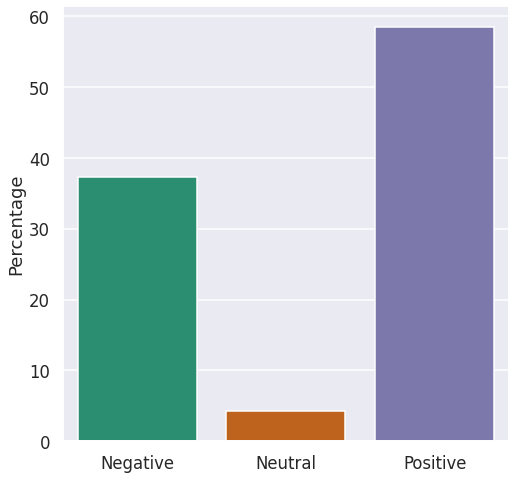

In [ ]:
# Final Step | Histogram
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

# Exploration

Homework 6, the final project, is open-ended: The goal is to prove or disprove a hypothesis using the skills learned in this class. In the real world, one would start with a specific question and find data to answer it, but the data needed often doesn't exist or is hard (or impossible) to find/access. The recommended, safer approach, for the purposes of this assignment:

1. Find a dataset that seems interesting.
  - [NYC OpenData](https://opendata.cityofnewyork.us/), [data.gov](https://www.data.gov/), and [Kaggle](https://www.kaggle.com/datasets) have many many options.
  - Finding a dataset available in CSV or Excel formats ([Pandas can also read the latter](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)) is recommended.
1. Look at the columns and some data in the dataset.
1. Come up with a question that the data is capable of answering and _isn't trivial to answer_.
  - If you aren't sure, ask.
1. Come up with a hypothesis (a.k.a. a guess of the answer to the question).
1. Answer the questions below, as the "pitch" for Homework 6. Example:
  - **Dataset:** [Recycling Diversion and Capture Rates](https://data.cityofnewyork.us/Environment/Recycling-Diversion-and-Capture-Rates/gaq9-z3hz)
  - **Question:** What community district increased their diversion (recycling) rate the most?
  - **Hypothesis:** [Bushwick](https://communityprofiles.planning.nyc.gov/brooklyn/4), because hipsters love to recycle.
1. Create a new notebook to do the actual analysis; you will turn that in separately.

## Expectations

Your question/hypothesis doesn't need to be something novel; confirming something you read in the news is fine. Your analysis should:

- Read like a narrative/diary/logbook, walking the reader through all analysis. Include any dead ends you hit.
- Use pandas
- Require more than a few lines of code to come to a conclusion
- Transform data through filtering (a.k.a. [boolean indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#boolean-indexing)), [grouping](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html), and/or [merging](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#database-style-dataframe-or-named-series-joining-merging) of DataFrames
- Have a visualization (chart or map) of some kind
- Be something that would be hard to do in a spreadsheet

## What dataset are you going to use?

_If multiple, how are you going to merge/join them?_

I am going to use NYC 311 Complaint Dataset for my final project. 
Dataset Name: 311 Service Requests from 2010 to Present
Dataset Link: https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9

## What's the question you are trying to answer?

I have a couple of ideas about my final assignment. 

Option1: Relationship netween noise compliant and under-18 childern living in those community district.

Option2: Relationship between street cleaniness score and 'Unsanitary Condition'(garbage on the streets) complaints.

Option3: Does poverty rate correlate with the number of 311 heat/hot water and unsanitary conditions requests across community districts?

Option4: Is there a correltion between type of complaint or service requested and location related?

## What's your hypothesis?

Option-1 Hypothesis:
From the data, I think the more chidlren or teenagers we have in the community (high under_18 rate), there will be more complaints about noise in residential area.

Option-2 Hypothesis:
There is a positive/negative correlation between street cleaniness score and 'Unsanitary Condition'(garbage on the streets) complaints. This is because if there are many complaints about unsanitary condition, it means the street is not clean. The more complaints about unsanitary condition there are, the less clean the streets are. 

Option-3 Hypothesis:
The hypothesis for this analysis is that community districts with higher prevalence of poverty will have increased number of heat/hot water and unsanitary conditions requests. Community districts with higher proportion of poverty tend to have a greater number of low income housing, commmonly in substandard, not properly/adequately maintained conditions. Neglected maintenance of these housing units exposes residents to malfunctioning heating units and poor and unsanitary living conditions (mold, rodents, etc.,). As a result, I hypothesize that the greater the prevalence of poverty in a community district, the higher the likelihood that residents will inititate 311 requests about heat/hot water and unsanitary conditions

# **Note:**

Dear Prof Aidan,

I would love to discuss all four options with you before I start my final assignment. 


Thanks & Regards,
Maitri

